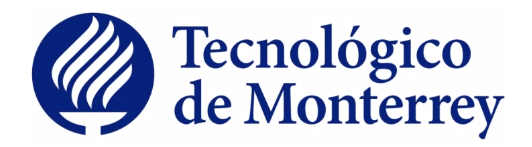

                            Campus Santa Fe                              

            Reporte: Logistic Regression Breast Cancer Dataset           

    Inteligencia artificial avanzada para la ciencia de datos I (Gpo 101)

                    Andrés Jaramillo Barón A01029079                     

                        Esteban Castillo Juarez                          

                                03/09/2025                               

#### Introducción


In [ ]:
import math
import random
import codecs
import numpy as np
import plotly.express as px
import plotly.io as pio
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [1015]:
training = []
test = []
trainingLabels = []
testLabels = []

iterations = 100
featureNumber = 5

print("Loading training samples")
with codecs.open("cancerTraining.txt", "r", "utf-8") as f:
    for line in f:
        elements=line.rstrip().split(",")
        feat = [float(x) for x in elements[:-1]]
        if elements[-1] == "malignant":
            label = 1
        else:
            label = 0
        training.append(feat)
        trainingLabels.append(label)

print("Load test samples")

with codecs.open("cancerTest.txt","r","UTF-8") as f:
    for line in f:
        elements=line.rstrip().split(",")
        feat = [float(x) for x in elements[:-1]]
        if elements[-1] == "malignant":
            label = 1
        else:
            label = 0
        test.append(feat)
        testLabels.append(label)

print("Training model:", training)
print("Training labels:", trainingLabels)
print("Test model:", test)
print("Test labels:", testLabels)

Loading training samples
Load test samples
Training model: [[2.0, 3.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0], [4.0, 4.0, 4.0, 2.0, 2.0, 3.0, 2.0, 1.0, 1.0], [7.0, 5.0, 3.0, 7.0, 4.0, 10.0, 7.0, 5.0, 5.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], [9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1.0], [5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [4.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0], [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0], [5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], [3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 4.0, 2.0, 1.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [5.0, 1.0, 3.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [10.0, 5.0, 5.0, 6.0, 8.0, 8.0, 7.0, 1.0, 1.0], [1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [4.0, 10.0, 8.0, 5.0, 4.0, 1.0, 10.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 

In [1016]:
import math
def sigmoid(z):
    if z >= 0:
        return 1.0 / (1.0 + math.exp(-z))
    else:
        ez = math.exp(z)
        return ez / (1.0 + ez)


In [1017]:
def relu(z):
    return z if z > 0 else 0

In [1018]:
def tanh(z):
    return np.tanh(z)

In [1019]:
def gradient(sampleList, weights):
    sumElements = 0.0
    for x, y in zip(sampleList, weights):
        sumElements += (x * y)
    return sigmoid(sumElements)

In [1020]:
def stochasticGradientAscent(trainingLists, trainingLabels, featureNumber, iterations = 150, alpha_changing = 0.01):
    sampleNumber = len(trainingLists)
    weights = [1.0] * featureNumber
    for x in range(iterations):
        sampleIndex = list(range(sampleNumber))
        for y in range(sampleNumber):
            alpha = 4/(1.0 + x + y) + alpha_changing
            randIndex = int(random.uniform(0, len(sampleIndex)))
            sampleGradient = gradient(trainingLists[randIndex], weights)
            error = trainingLabels[randIndex] - sampleGradient
            temp = []
            for index in range(featureNumber):
                temp.append(alpha * (error * trainingLists[randIndex][index]))
            for z in range(featureNumber):
                weights[z] += temp[z]
            del(sampleIndex[randIndex])
    return weights

In [1021]:
def classifyList(testList, weights, activation_fn):
    sumElements = 0.0
    for x, y in zip(testList, weights):
        sumElements += x * y
        probability = activation_fn(sumElements)
    if activation_fn == sigmoid:
        return 1 if probability > 0.5 else 0
    elif activation_fn == relu or activation_fn == tanh:
        return 1 if probability > 0 else 0
    else:
        raise ValueError("Unknown activation function")

In [1022]:
print("Apply the stochastic gradient ascent over training samples")
optimalWeights = stochasticGradientAscent(training, trainingLabels, featureNumber, iterations)

Apply the stochastic gradient ascent over training samples


In [1023]:
print("Use the obtained weights over test samples for clasifying")

correctPredictions = 0
totalPredictions = 0

for x, y in zip(test, testLabels):
    totalPredictions += 1
    predicted = classifyList(x, optimalWeights, sigmoid)
    if predicted == y:
        correctPredictions += 1
    print("Predicted:", predicted, "Actual:", y)

print("Model accuracy:", round((correctPredictions / totalPredictions) * 100, 2), "%")

Use the obtained weights over test samples for clasifying
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0

In [1024]:
bestSigmoidAcc = 0
bestReluAcc = 0
bestSigmoidParams = (None, None)
bestReluParams = (None, None)
bestSigmoidWeights = None
bestReluWeights = None

for epochs in range(1, 151):
    for alpha in [i/100 for i in range(1, 31)]:
        weights = stochasticGradientAscent(training, trainingLabels, featureNumber, iterations=epochs, alpha_changing=alpha)

        # Sigmoid
        correct = sum(classifyList(x, weights, sigmoid) == y for x, y in zip(test, testLabels))
        accSigmoid = correct / len(test)
        if accSigmoid > bestSigmoidAcc:
            bestSigmoidAcc = accSigmoid
            bestSigmoidParams = (epochs, alpha)
            bestSigmoidWeights = weights[:]

print("Best Sigmoid Params:", bestSigmoidParams, "Best Sigmoid Acc:", round(bestSigmoidAcc * 100, 2), "%", "Best Sigmoid Weights:", bestSigmoidWeights)

for epochs in range(1, 151):
    for alpha in [i/100 for i in range(1, 31)]:
        weights = stochasticGradientAscent(training, trainingLabels, featureNumber, iterations=epochs, alpha_changing=alpha)

        # ReLU
        correct = sum(classifyList(x, weights, relu) == y for x, y in zip(test, testLabels))
        accRelu = correct / len(test)
        if accRelu > bestReluAcc:
            bestReluAcc = accRelu
            bestReluParams = (epochs, alpha)
            bestReluWeights = weights[:]

print("Best ReLU Params:", bestReluParams, "Best ReLU Acc:", round(bestReluAcc * 100, 2), "%", "Best ReLU Weights:", bestReluWeights)

Best Sigmoid Params: (134, 0.01) Best Sigmoid Acc: 89.0 % Best Sigmoid Weights: [-0.20577420911194286, 0.7850590735294276, 0.24248076312986347, 0.15340362600847865, -1.1734506547433325]
Best ReLU Params: (33, 0.01) Best ReLU Acc: 88.0 % Best ReLU Weights: [-0.2862556789969127, 1.042627567662606, 0.10803002261216349, 0.5725493088546065, -1.4499801704779034]


In [ ]:
predsSigmoid = [classifyList(x, bestSigmoidWeights, sigmoid) for x in test]
predsRelu = [classifyList(x, bestReluWeights, relu) for x in test]

precSigSk = precision_score(testLabels, predsSigmoid)
recSigSk  = recall_score(testLabels, predsSigmoid)
cmSigSk   = confusion_matrix(testLabels, predsSigmoid)

print("Sigmoid:")
print("Precision:", round(precSigSk * 100, 2), "%")
print("Recall:", round(recSigSk * 100, 2), "%")
print("Matriz de confusión:\n", cmSigSk)

precReluSk = precision_score(testLabels, predsRelu)
recReluSk  = recall_score(testLabels, predsRelu)
cmReluSk   = confusion_matrix(testLabels, predsRelu)

print("\nReLU:")
print("Precision:", round(precReluSk * 100, 2), "%")
print("Recall:", round(recReluSk * 100, 2), "%")
print("Matriz de confusión:\n", cmReluSk)



Sigmoid:
Precision: 85.71 %
Recall: 69.23 %
Matriz de confusión:
 [[71  3]
 [ 8 18]]

ReLU:
Precision: 76.92 %
Recall: 76.92 %
Matriz de confusión:
 [[68  6]
 [ 6 20]]


In [1037]:
cmAvg = (cmSigSk + cmReluSk) / 2.0

fig = px.imshow(
    cmAvg,
    text_auto=True,
    color_continuous_scale="Blues",
    labels=dict(x="Predicted", y="Actual", color="Count"),
    x=["Pred 0", "Pred 1"],
    y=["True 0", "True 1"],
    title="Matriz de Confusión Promedio (Sigmoid + ReLU)"
)
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")
fig.write_html("matriz_confusion_promedio.html")

In [1028]:
logistic = LogisticRegression()

logistic.fit(training, trainingLabels)

predictions = logistic.predict(test)

print("Predictions vs. True Labels:")
for i in range(len(predictions)):
    print("Predicted:", predictions[i], "Actual:", testLabels[i])

accuracy = accuracy_score(testLabels, predictions)
print("Model accuracy: ", round(accuracy * 100, 2), "%")

Predictions vs. True Labels:
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predi